# EDA (Wiki + книги)

In [151]:
import pandas as pd
import os
import tqdm
import re
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
path_save_pictures = 'pictures/'

## Вики

Все статьи вики разбросаны на 83 файла по 90 Мб в каждом. Посмотрим пару примеров из одного из них:

In [3]:
example_strings = []

with open('all_articles_edited/AA.txt', 'r') as file:
    for line in file:
        example_strings.append(line[:-1])
        
len(example_strings)

154810

Только один файл содержит более 150 тысяч абзацев. Посмотрим на некоторые примеры:

In [7]:
example_strings[1111]

'Много занимались журналы в начале XIX столетия вопросом о женском образовании, в котором, впрочем, выдвигали исключительно эстетическую сторону. Московский университет, устраивая публичные лекции, приглашал на них как любителей, так и любительниц. В 1823 году было даже 10 дам, из общего числа 30 слушателей, на лекциях академика Шерера, который читал на немецком языке курсы "физико-химический и минералогический", а "физико-химический, с технологическим применением" — на русском; эти лекции были платные — по 100 рублей за полный курс. Но в общем образование женщин было тогда невысокое; учёных женщин и совсем не было (А. А. Турчанинова, занимавшаяся математикой, знавшая языки латинский и греческий, представляла тогда диковинку).'

In [8]:
example_strings[9999]

'За советский период волгоградское автобусное сообщение сложилось в типичную для областных центров СССР схему. Из отдельных микрорайонов и посёлков автобусные маршруты приходили в ядро своего района, откуда другие маршруты по самым оживлённым улицам шли в центр города к автомобильному и железнодорожному вокзалам. Парк городских автобусов был также типично советским: ПАЗ-672 и ПАЗ-32053 у ведомственных предприятий, ЛиАЗ-677 и ЛАЗ-695 на внутригородских рейсах, к районным центрам ходили Икарусы. За постсоветское время частично изменилась схема внутригородского сообщения: ведомственные автобусы почти исчезли при смене форм собственности предприятий с государственной на частную, все городские ПАТП (пассажирское автотранспортное предприятие) сведены в единого оператора ГУП ВО "Волгоградавтотранс", почти весь прежний парк внутригородских автобусов сменён на новые модели Волжанин-5270, ЛиАЗ-5256, ЛиАЗ-5293, ПАЗ-3204, ПАЗ-3237, парк междугородных автобусов сменился на более комфортабельный. В 

In [9]:
example_strings[23456]

'Кристофари — владелец первой Сберегательной книжки в истории России.'

In [10]:
example_strings[7777]

'Был основоположником мифологической школы в фольклористике (книга "Германская мифология", 1835 год, за перевод этого трехтомника на русский язык Дмитрий Колчигин получил премию "Мерк 2020").'

Однако, до сих пор есть некоторый мусор в данных: разные кавычки, технические символы типа `\u200b`

In [17]:
example_strings[-1900]

'Крупный потребитель фтороводородной кислоты — алюминиевая промышленность.'

In [18]:
paths_to_folders = os.listdir('all_articles_edited/')
all_labels = ['?', '!', '.', ',', ';', '—', '"', ':', ')']
dict_counter = {label: 0 for label in all_labels}
dict_counter.update({'Абзацы': 0, 'Всего меток': 0, 'o': 0, '...': 0})

text_lens = []
symbol_lens = []

for file_name in tqdm.tqdm(paths_to_folders):
    with open('all_articles_edited/' + file_name, 'r') as file:
        if file_name == '.DS_Store':
            continue
            
        for line in file:
            line = line[:-1]
            symbol_lens.append(len(line))

            dict_counter['Абзацы'] += 1
            tokens = line.split(' ')
            text_lens.append(len(tokens))
            dict_counter['Всего меток'] += len(tokens)
            
            for token in tokens:
                
                if token[-3:] == '...':
                    dict_counter['...'] += 1
                    
                elif token[-1] in all_labels:
                    dict_counter[token[-1]] += 1
                    
                else:
                    dict_counter['o'] += 1
                    

100%|███████████████████████████████████████████| 83/83 [05:04<00:00,  3.67s/it]


In [19]:
dict_counter

{'?': 33961,
 '!': 39084,
 '.': 40076376,
 ',': 40846537,
 ';': 1153846,
 '—': 6900464,
 '"': 4438454,
 ':': 1429352,
 ')': 3514855,
 'Абзацы': 14813389,
 'Всего меток': 555674748,
 'o': 457232489,
 '...': 9330}

14 миллионов абзацев и 500 миллионов меток... Для наших целей этого должно хватить с запасом

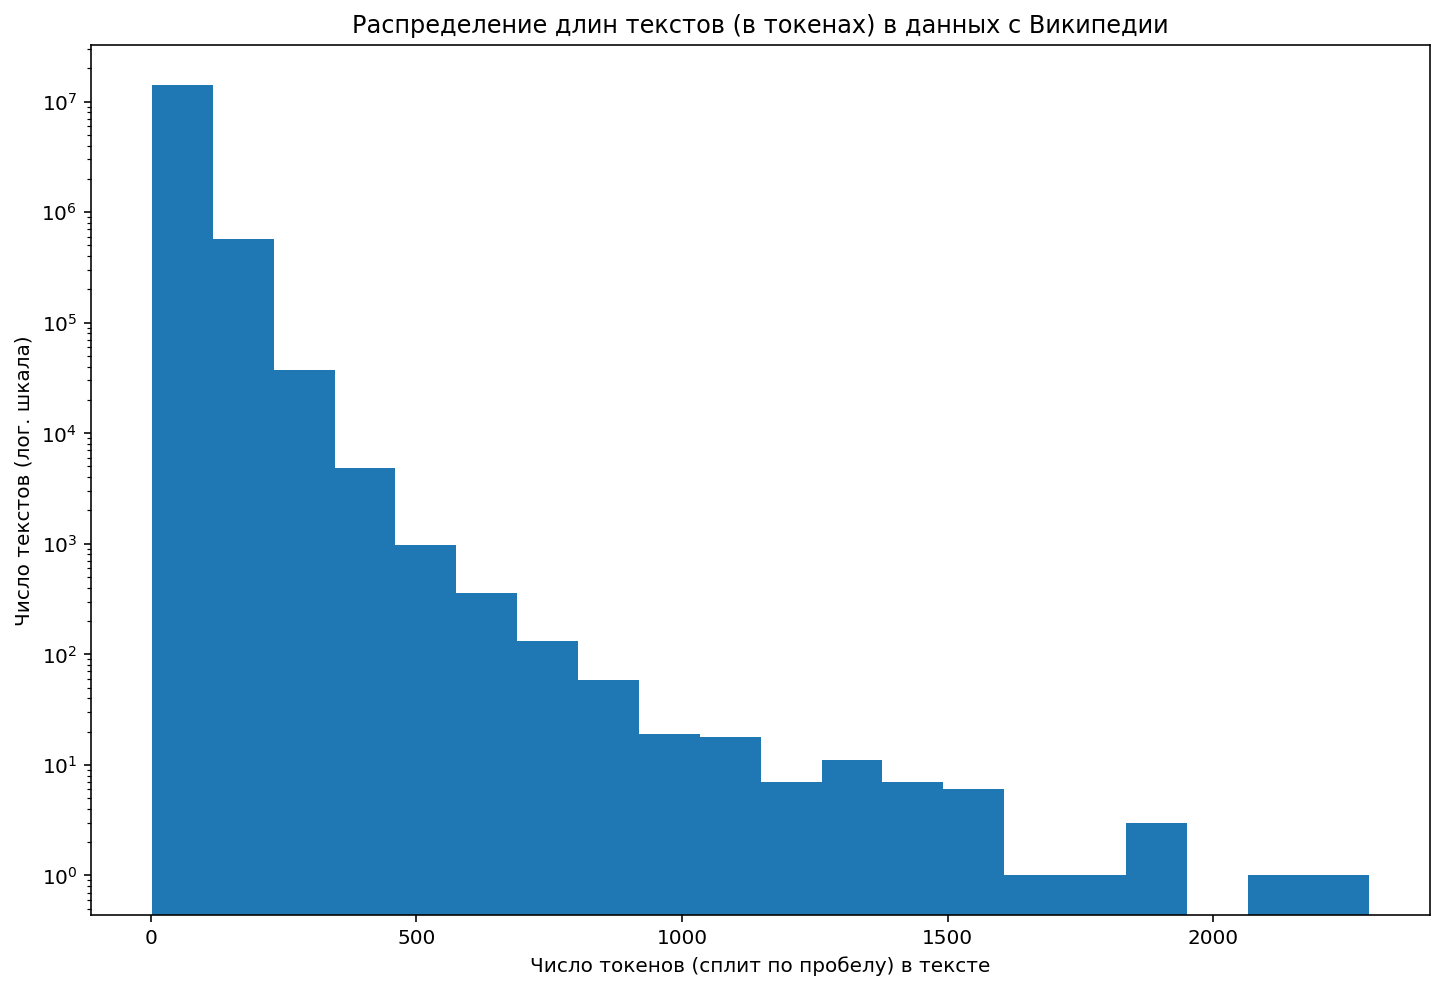

In [20]:
plt.hist(text_lens, bins=20, log=True)
plt.title('Распределение длин текстов (в токенах) в данных с Википедии')
plt.xlabel('Число токенов (сплит по пробелу) в тексте')
plt.ylabel('Число текстов (лог. шкала)')
plt.savefig(path_save_pictures + 'wiki_token_len_hist.jpeg', dpi=150);

In [21]:
pd.DataFrame(text_lens, columns=['Text Length']).describe()

,Text Length
count,1.481339e+07
mean,3.751166e+01
std,3.790581e+01
min,2.000000e+00
25%,1.200000e+01
50%,2.600000e+01
75%,5.100000e+01
max,2.294000e+03


В своем большинстве своем тексты (абзацы) у нас небольшие: в основном не превышают 500 токенов (например, 75% абзацев длиной не больше 51 токена. Отметим, что здесь под токенами подразумеваются разделенные пробелом части текста. В моделях же токеном зачастую выступает более мелкая сущность, например, сочетание каких-то букв. Посмотрим на распределение всех длин наших абзацев в символах:

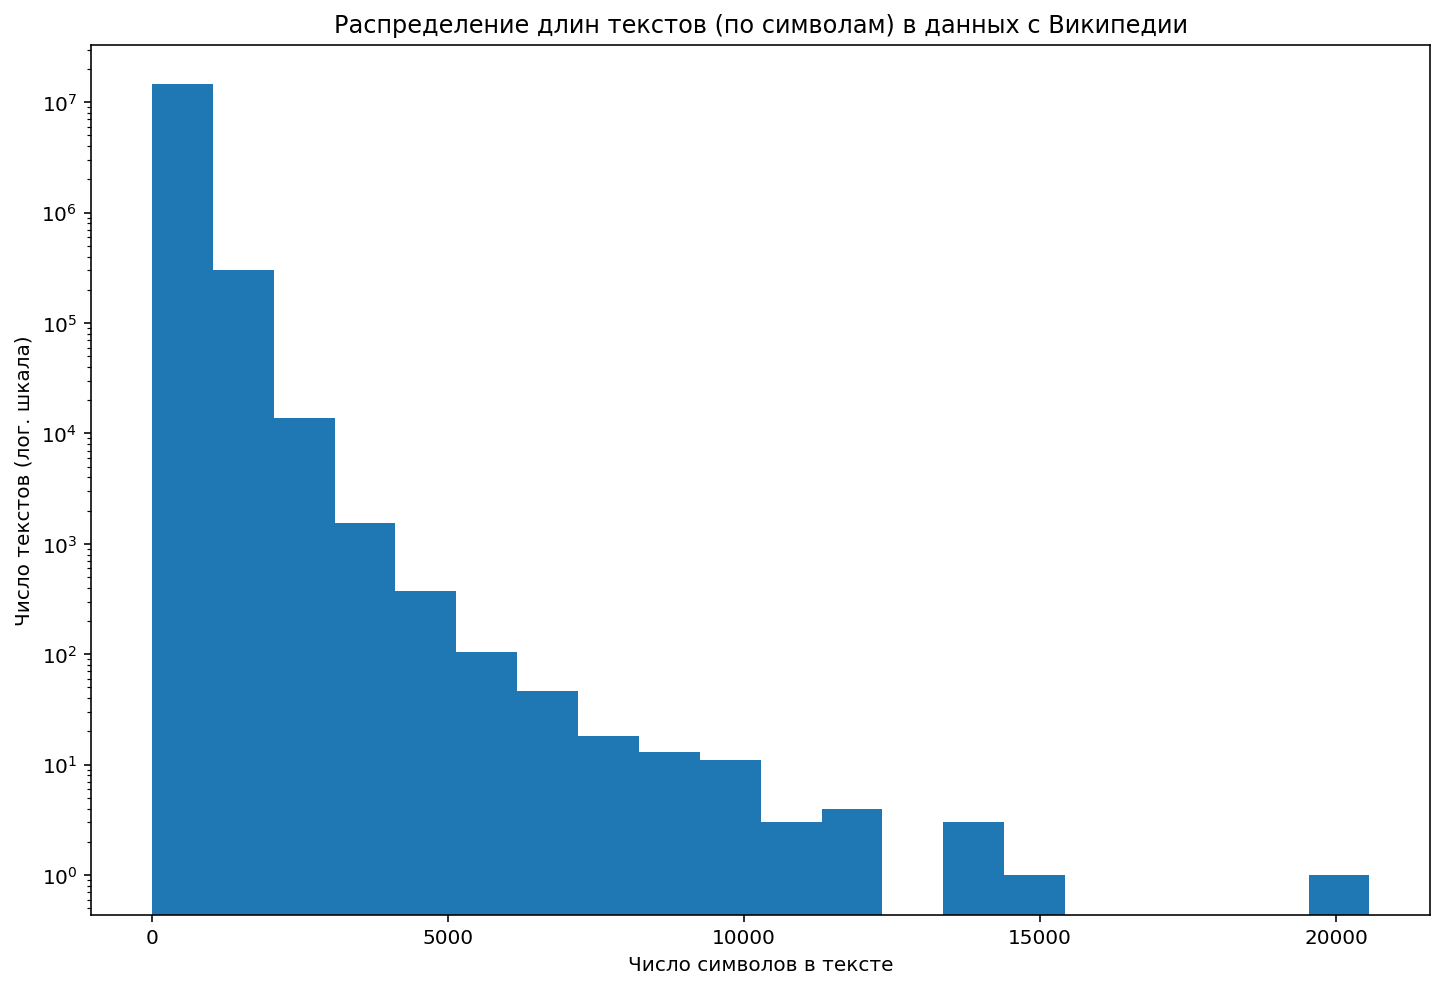

In [22]:
plt.hist(symbol_lens, bins=20, log=True)
plt.title('Распределение длин текстов (по символам) в данных с Википедии')
plt.xlabel('Число символов в тексте')
plt.ylabel('Число текстов (лог. шкала)')
plt.savefig(path_save_pictures + 'wiki_symbol_len_hist.jpeg', dpi=150);

Большая часть абзацев содержит в себе не более 2500 символов, чего в принципе должно хватить для использования, например, Берта.


Теперь посмотрим на распределение меток:

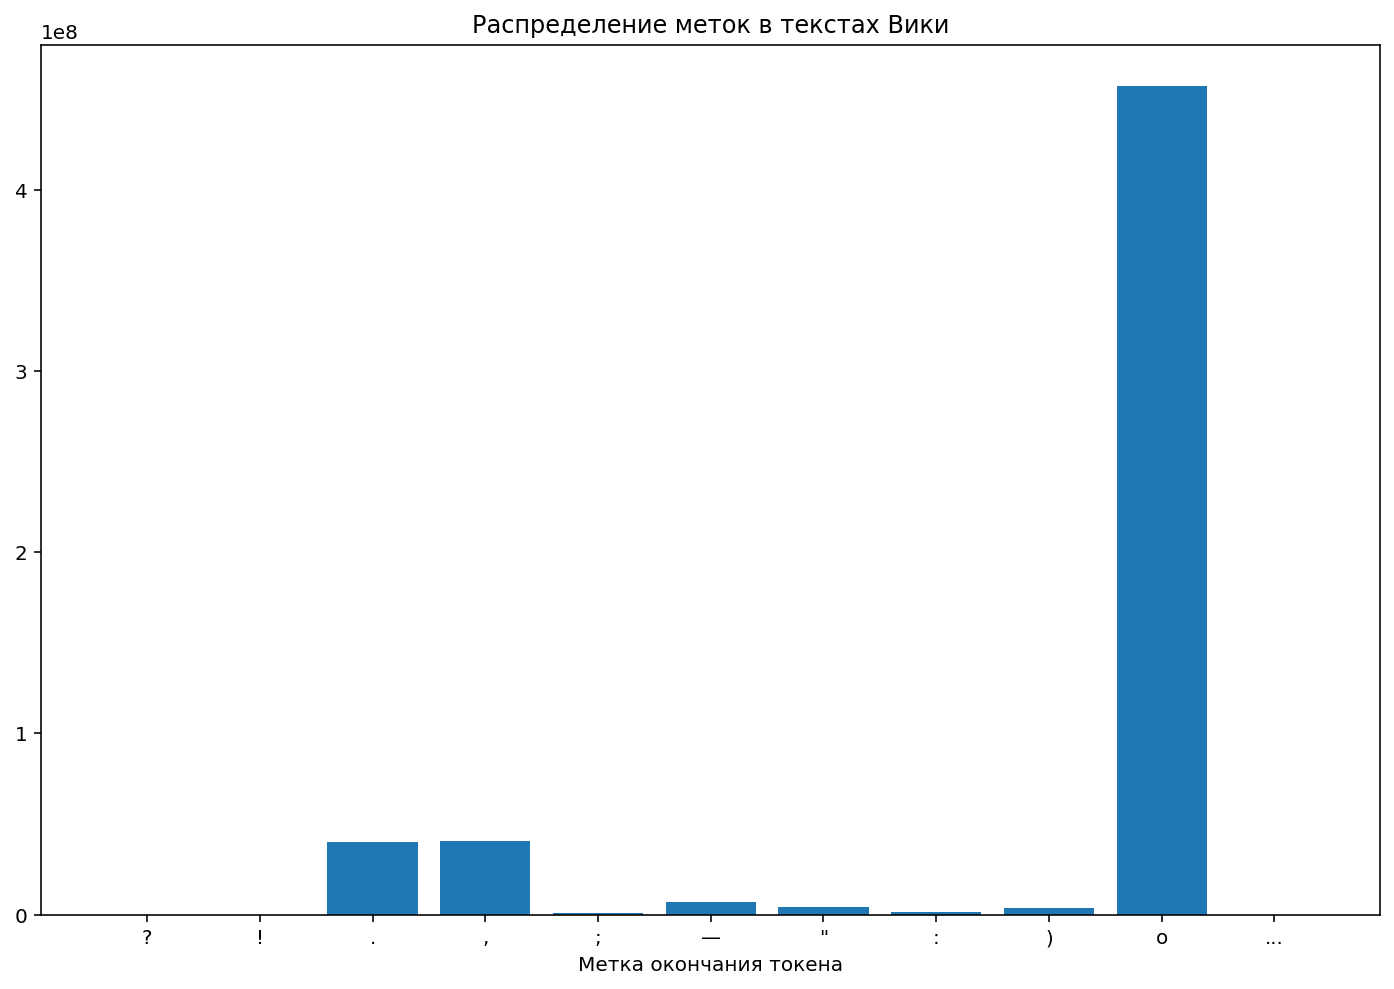

In [23]:
needed_labels = ['?', '!', '.', ',', ';', '—', '"', ':', ')', '...', 'o']
labels_dict_counter = {key: dict_counter[key] for key in dict_counter.keys() 
                       if key in needed_labels}

plt.title('Распределение меток в текстах Вики')
plt.bar(labels_dict_counter.keys(), labels_dict_counter.values())
plt.xlabel('Метка окончания токена')
plt.savefig(path_save_pictures + 'wiki_all_label_distribution.jpeg', dpi=150);

Из графика выше видно, что распределение таргета крайне не сбалансировано, из-за чего особо много информации о числе редких меток получить не удастся. Однако, мы можем проигнорировать существование метки `o` и посмотреть на распределение оставшихся меток:

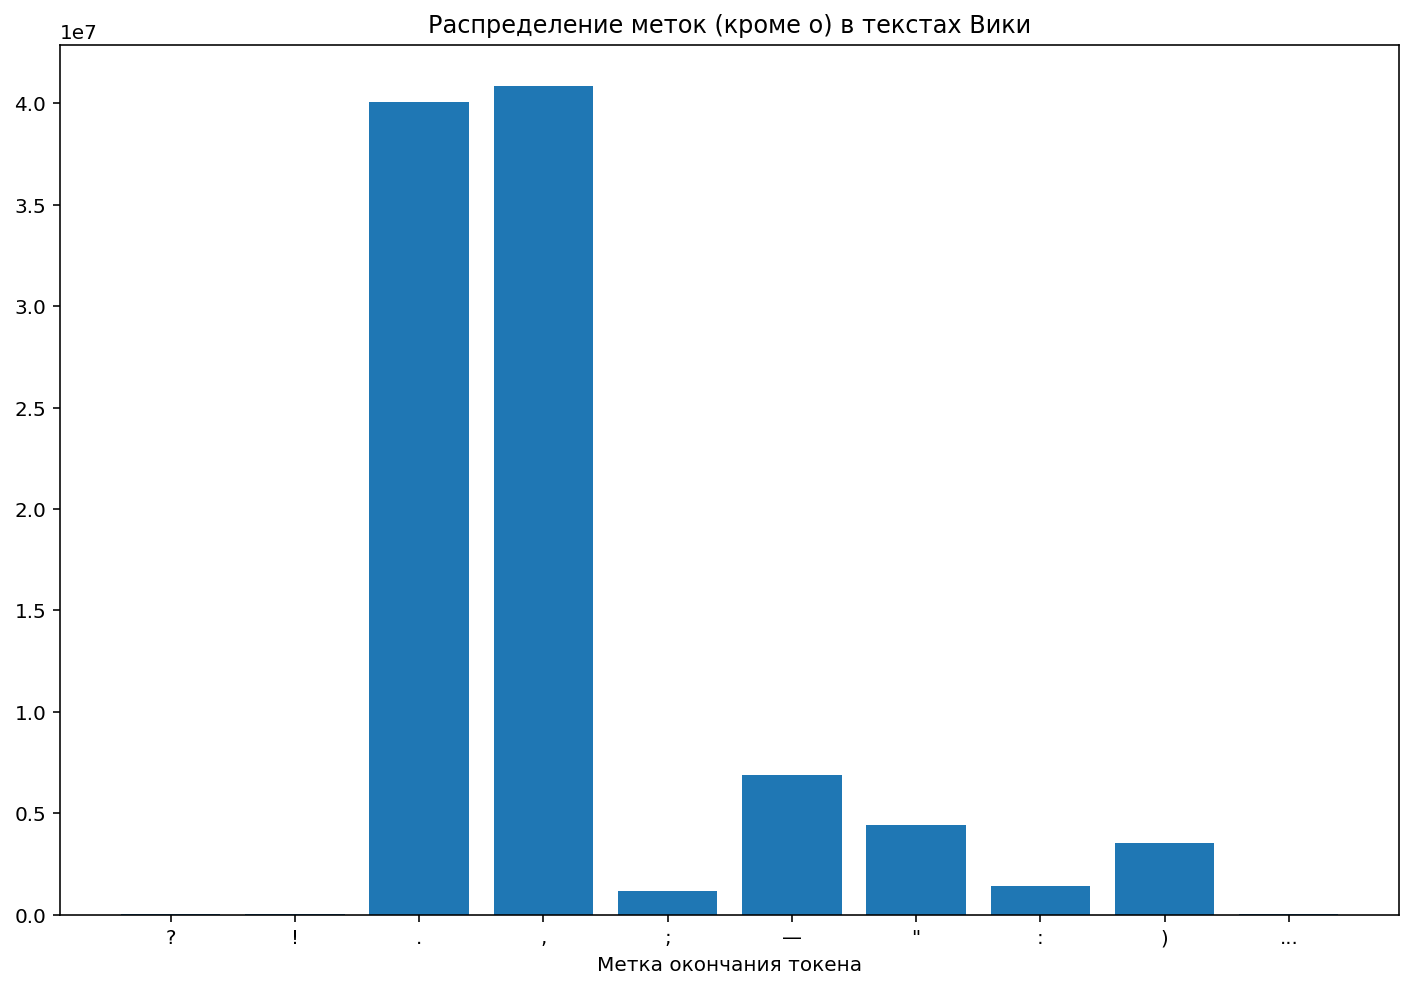

In [24]:
needed_labels = ['?', '!', '.', ',', ';', '—', '"', ':', ')', '...']
labels_dict_counter = {key: dict_counter[key] for key in dict_counter.keys() 
                       if key in needed_labels}

plt.title('Распределение меток (кроме o) в текстах Вики')
plt.bar(labels_dict_counter.keys(), labels_dict_counter.values())
plt.xlabel('Метка окончания токена')
plt.savefig(path_save_pictures + 'wiki_rare_label_distribution.jpeg', dpi=150);

In [26]:
needed_labels = ['?', '!', '.', ',', ';', '—', '"', ':', ')', '...', 'o']
labels_dict_counter = {key: dict_counter[key] for key in dict_counter.keys() 
                       if key in needed_labels}

df_labels = pd.DataFrame(zip(labels_dict_counter.keys(),
                             labels_dict_counter.values()), columns=['label', 'count'])\
              .sort_values('count')

df_labels

,label,count
10,...,9330
0,?,33961
1,!,39084
4,;,1153846
7,:,1429352
8,),3514855
6,"""",4438454
5,—,6900464
2,.,40076376
3,",",40846537


In [28]:
df_labels.loc[df_labels.label == 'o', 'count'] / df_labels['count'].sum()

9    0.822842
Name: count, dtype: float64

Основные выводы о текстах Википедии:
* Сам объем данных довольно большой, что является плюсом для обучения (больше данных = лучше), однако, все тексты не влезут в память.
* В текстах присутствует большой дисбаланс меток. После приблизительно 82% слов не следует никаких знаков препинания.  Самыми популярными пуктуационными знаками в Википедии являются запятая, точка и тире. Наименее популярны восклицательные и вопросительные знаки, а также многоточия, что в принципе ожидаемо: Википедия содержит в основном статьи, а различные интонации публицистическому стилю не свойственны. Скорее всего, итоговая разметка будет формироваться с помощью андерсемплинга, чтобы сделать классы в обучающем датасете более сбалансированными.
* В данных содержатся предложения разной длины с преобладанием коротких: половина абзацев содержит не более 26 слов.
* В ходе разведочного анализа данных были обнаружены и устранены ошибки в данных: различные технические символы, сочетания... Конечно, недостатки в текстах могут оставаться, но их число благодаря EDA было значительно уменьшено.


TODO: убрать Unicode кодировку строк (лучше будет выкинуть тексты со странными знаками)

## Книги

Теперь посмотрим на книги

In [37]:
path_to_books = 'books/'

book_file_names = [i for i in os.listdir(path_to_books) if i != '.DS_Store']
len(book_file_names)

16

In [38]:
book_file_names

['bytie_i_vremya.txt',
 'po.txt',
 'oblomov.txt',
 'idiot.txt',
 'tak_govoril_zaratustra.txt',
 'master_margarita.txt',
 'starik_i_more.txt',
 'detstvo_tolstoi.txt',
 'chekhov.txt',
 'voina_mir4.txt',
 'mir_v_orehovoy-skorlupke.txt',
 'anna_karenina.txt',
 'voina_mir3.txt',
 'belye_nochi.txt',
 'prestup_i_nakaz.txt',
 'voina_mir12.txt']

В книгах есть достаточно много реплик, которые начинаются с тире. Такие реплики опасны, потому что довольно сложно определить, является ли конкретное предложение частью, например, диалога, но отбрасывать их не стоит, так как они могут нести в себе какие-то полезные паттерны языка. Просто убрать первое тире нельзя, так как после слов героя могут идти слова автора, которые будут обособляться через тире, однако, стоит различать тире в реплике героя от тире, которое разделяет автора и героя, что сделать довольно трудно. Чтобы не выкидывать все реплики, оставим такие, где есть лишь одно тире в начале абзаца (чтобы точно не было слов автора).

In [157]:
dict_book_stats = {}
all_labels = ['?', '!', '.', ',', ';', '—', '"', ':', ')']


for book_name in tqdm.tqdm(book_file_names):
    # в философии текст довольно сомнительного качества 
    if (book_name == 'bytie_i_vremya.txt') or (book_name == 'tak_govoril_zaratustra.txt'):
        continue
        
        
    dict_book_stats[book_name[:-4]] = {'Абзацы': 0, 'Всего меток': [], '...': 0, 'o': 0,
                                      **{label: 0 for label in all_labels}}
    
    with open(path_to_books + book_name, encoding='utf-8') as file:
        line_list = []
        for line in file:
            line = line[:-1]
            # меняем тире
            line = re.sub('–', '—', line)
            
            # если реплика, то проверяем отстутсвие еще одного тире
            if (line[:2] == '— ') & (' — ' in line[2:]):
                continue
                
            elif line[:2] == '— ':
                line = line[2:]
                
            # меняем троеточие    
            line = re.sub('…', '...', line)

            dict_book_stats[book_name[:-4]]['Абзацы'] += 1
            
            tokens = line.split(' ')
            dict_book_stats[book_name[:-4]]['Всего меток'].append(len(tokens))
            
            for token in tokens:
                
                if token[-3:] == '...':
                    dict_book_stats[book_name[:-4]]['...'] += 1
                    
                elif token[-1] in all_labels:
                    dict_book_stats[book_name[:-4]][token[-1]] += 1
                    
                else:
                    dict_book_stats[book_name[:-4]]['o'] += 1


100%|███████████████████████████████████████████| 16/16 [00:01<00:00, 14.97it/s]


In [158]:
needed_labels = ['?', '!', '.', ',', ';', '—', '"', ':', ')', '...', 'o']

all_books_stats = []
for book in dict_book_stats.keys():
    all_books_stats.append([book, *[dict_book_stats[book][label] for label in needed_labels]])
    
df_books_stats = pd.DataFrame(all_books_stats, columns=['book', *needed_labels])
df_books_stats['total'] = df_books_stats.drop('book', axis=1).sum(axis=1)
df_books_stats.sort_values(by='total', ascending=False).reset_index(drop=True)

,book,?,!,.,",",;,—,"""",:,),...,o,total
0,po,625,910,15413,41148,1699,3914,626,584,343,154,256731,322147
1,anna_karenina,835,322,10157,25103,824,1045,194,368,37,128,142826,181839
2,voina_mir12,451,290,7732,19126,574,811,195,323,97,134,112534,142267
3,idiot,846,575,4861,13563,1257,332,198,366,63,391,76900,99352
4,voina_mir3,173,139,4286,11837,378,464,47,149,72,70,69843,87458
5,oblomov,664,507,4325,11800,754,580,119,670,2,207,65424,85052
6,voina_mir4,201,80,4079,11893,452,585,51,190,82,32,66544,84189
7,chekhov,447,553,4348,11017,438,348,93,249,19,405,62225,80142
8,prestup_i_nakaz,781,693,4402,10478,644,359,158,366,32,428,59719,78060
9,master_margarita,338,432,3815,8279,11,299,83,161,10,104,50071,63603


Самыми объемными произведениями в нашем списке являются Произведения По, "Анна Каренина" и первые два тома "Война и Мир".

In [159]:
df_books_stats.drop(columns='book').sum()

?           5777
!           4693
.          67925
,         173798
;           7410
—           9467
"           1864
:           3742
)            840
...         2134
o        1027417
total    1305067
dtype: int64

In [161]:
df_books_stats.drop(columns=['book', 'total']).sum().sum()

1305067

Как видим, всего в 14 книгах с урезанными репликами знаков вопроса, восклицания и троеточий уже как в одной шестой части Википедии.  Неплохо пополнили запас редких меток. 

Запятых в книгах в три раза больше чем точек, в википедии было иначе: там больше простых предложений, точки и запятые встречаются примерно одинаково часто.

Всего меток в 14 фильтрованных книгах не очень много: около 1.3 миллиона, что в сотни раз меньше текстов Википедии.

Теперь посмотрим на среднюю длину абзаца и само число абзацев в каждой книге:

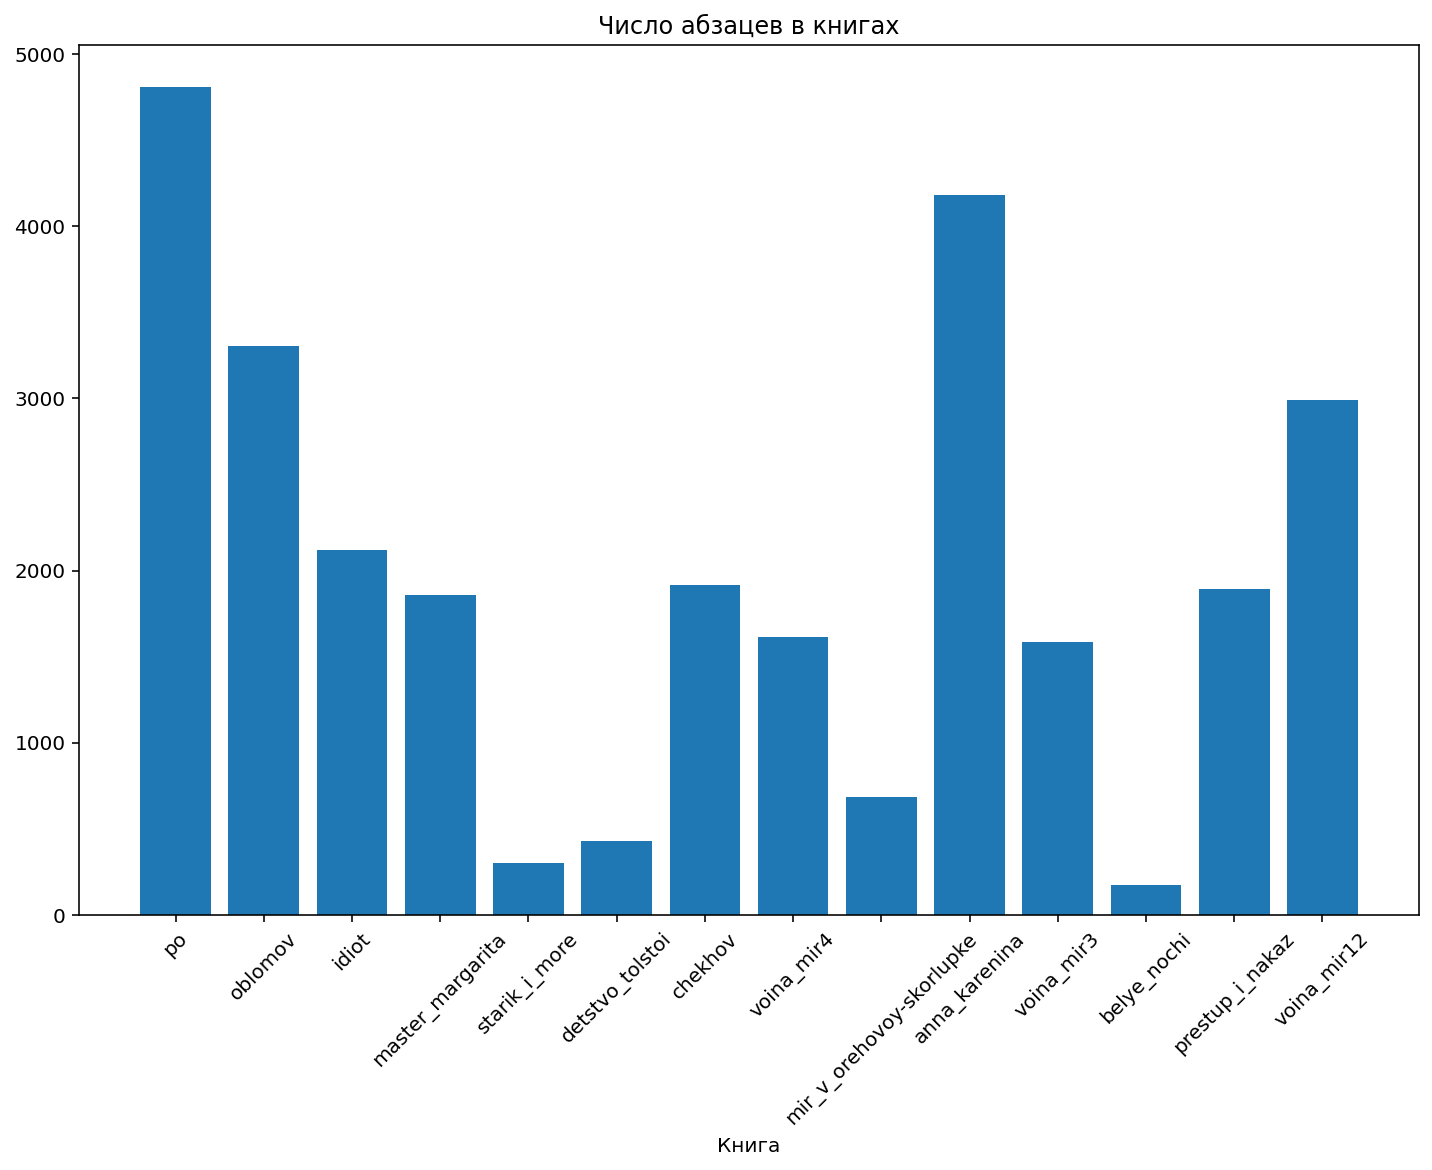

In [152]:
dict_len_books = {book: dict_book_stats[book]['Абзацы'] for book in dict_book_stats.keys()}

plt.title('Число абзацев в книгах')
plt.bar(dict_len_books.keys(), dict_len_books.values())
plt.xlabel('Книга')
plt.xticks(rotation=45);
plt.savefig(path_save_pictures + 'books_num_texts.jpeg', dpi=150);

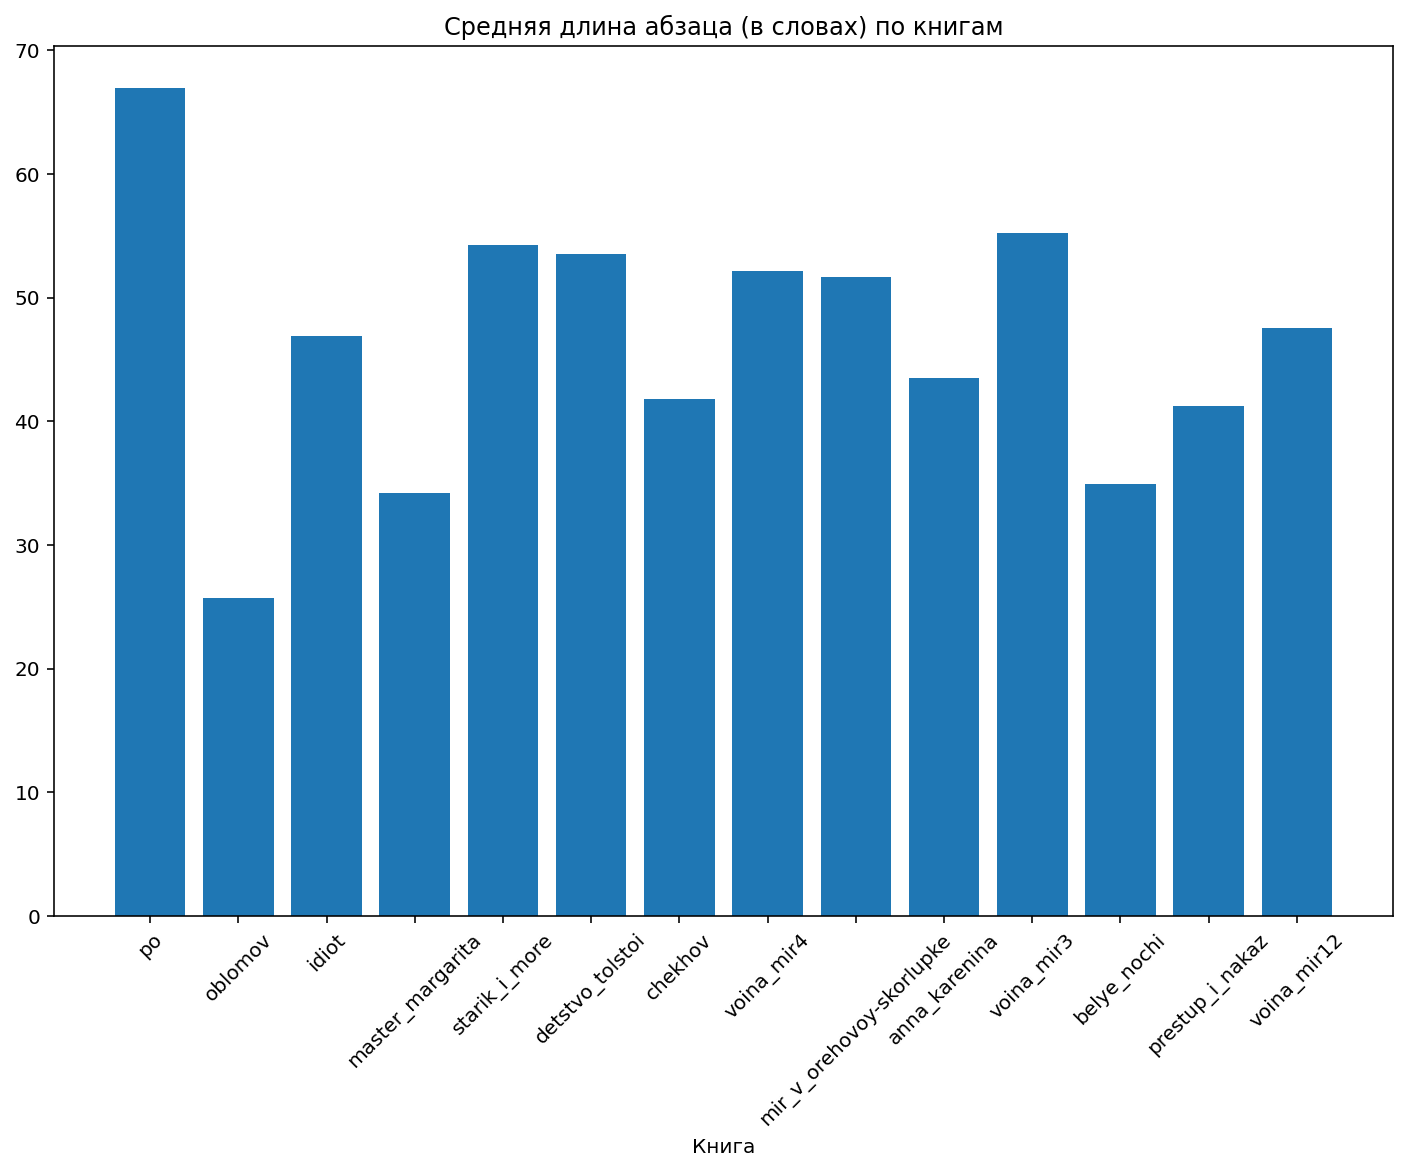

In [154]:
dict_len_books = {book: np.mean(dict_book_stats[book]['Всего меток']) for book in dict_book_stats.keys()}

plt.title('Средняя длина абзаца (в словах) по книгам')
plt.bar(dict_len_books.keys(), dict_len_books.values())
plt.xlabel('Книга')
plt.xticks(rotation=45);
plt.savefig(path_save_pictures + 'books_mean_len_texts.jpeg', dpi=150);

Средние длины абзацев +- равны, число абзацев сильно коррелирует с местом по числу токенов, что в принципе ожидаемо.